In [31]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)
library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)
library("RColorBrewer")
#install.packages('reshape2')
library(reshape2)
require(rgdal)
install.packages('mapproj')
require(mapproj)

Warning message:
"package 'mapproj' is in use and will not be installed"


ML1,ML6,ML3,ML5,ML2,ML7,ML4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.572418217,0.27948505,0.4740642,0.48905269,0.3327190,0.6406390,0.5244550
0.173347287,0.16631234,0.7812555,0.21604457,0.3179487,0.2668756,0.5813036
0.555402896,0.26567935,0.6221088,0.51799504,0.4010244,0.8739405,0.4280040
0.006249719,0.01802207,0.9992766,0.05567089,0.0000000,0.1978413,0.5088645
0.172305543,0.17209406,0.6946237,0.41693952,0.2060016,0.4634648,0.4247652
0.116506831,0.08746231,0.0000000,0.29168400,0.1829046,0.1907371,0.5876124


clusters,Far-away Dugwell,Spring,Piped to homes,Piped to Yard and Tap,"Bottle, Rain, Vendors",Near-by Surface,Near-by borehole
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5772895,0.3551004,0.5083081,0.5406823,0.2896757,0.5182122,0.6721096
2,0.1207319,0.1722097,0.5267564,0.3216871,0.4563813,0.1655475,0.5040695
3,0.2426426,0.1464495,0.7482010,0.4242080,0.2079698,0.3301570,0.4164274


[1] "#E41A1C" "#377EB8" "#4DAF4A"

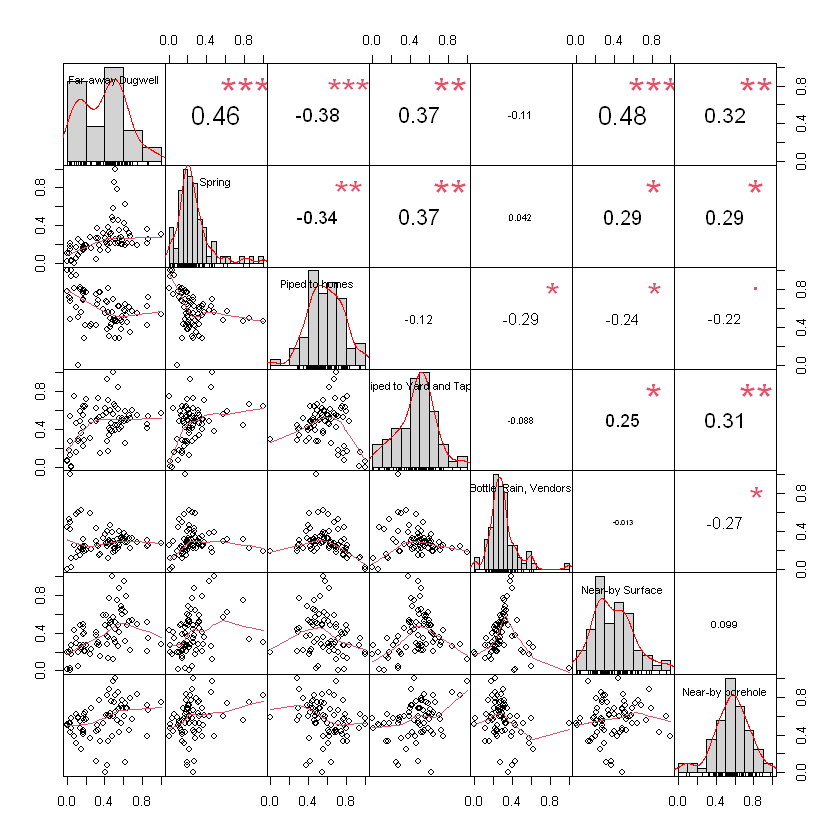

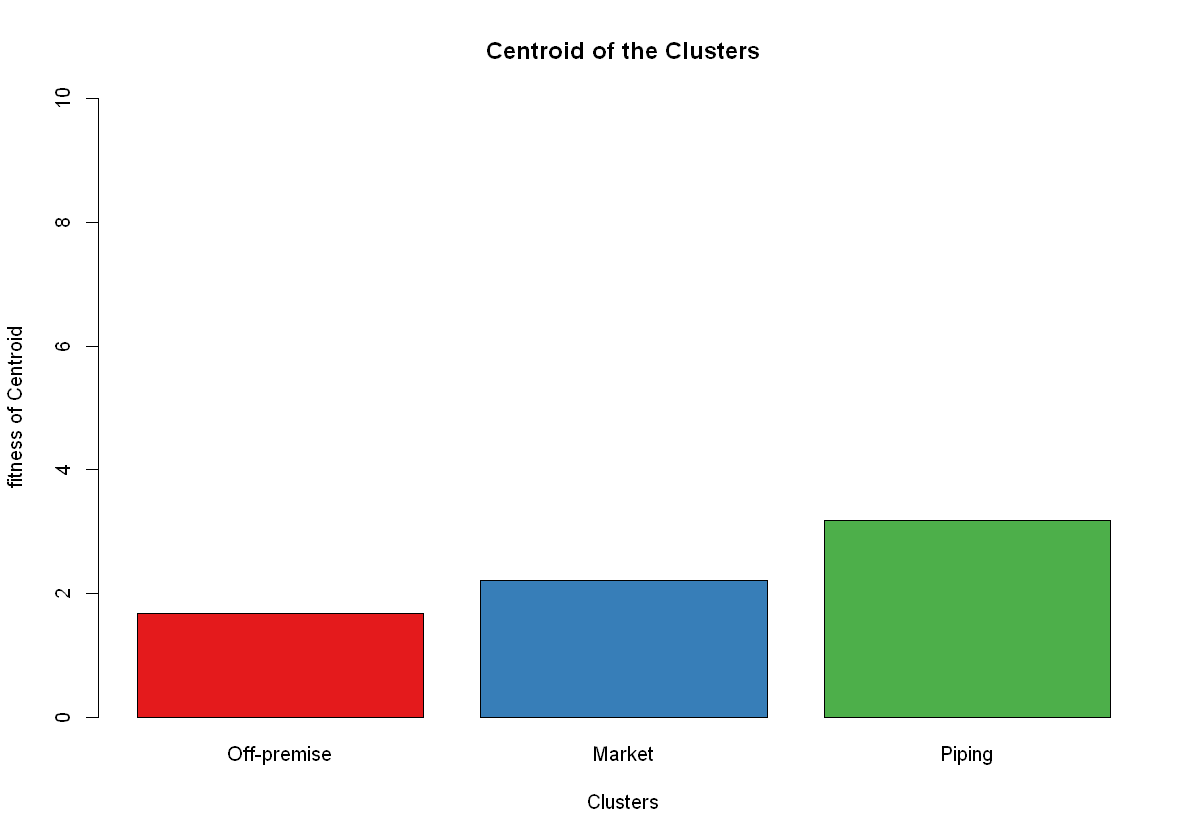

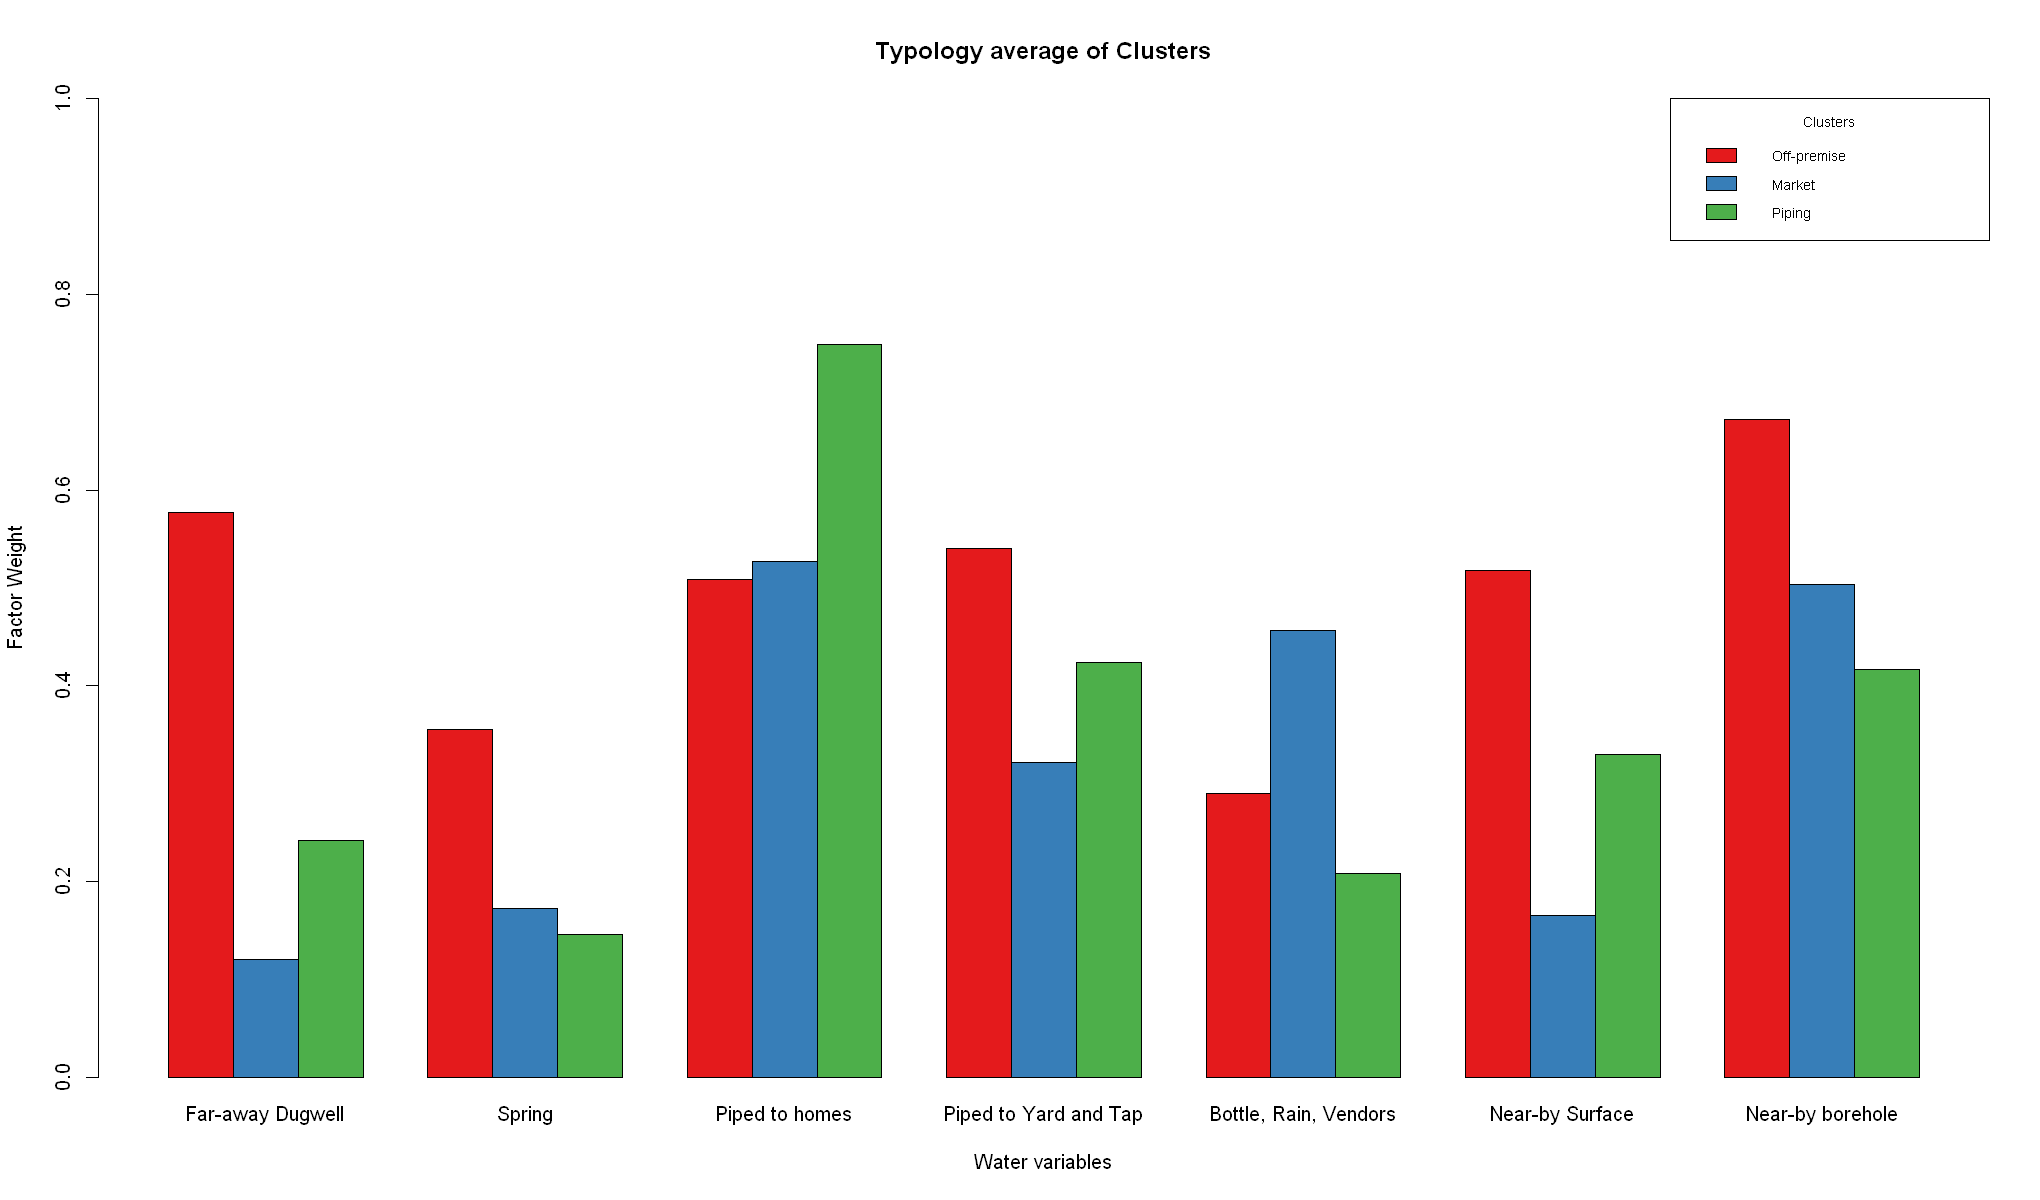

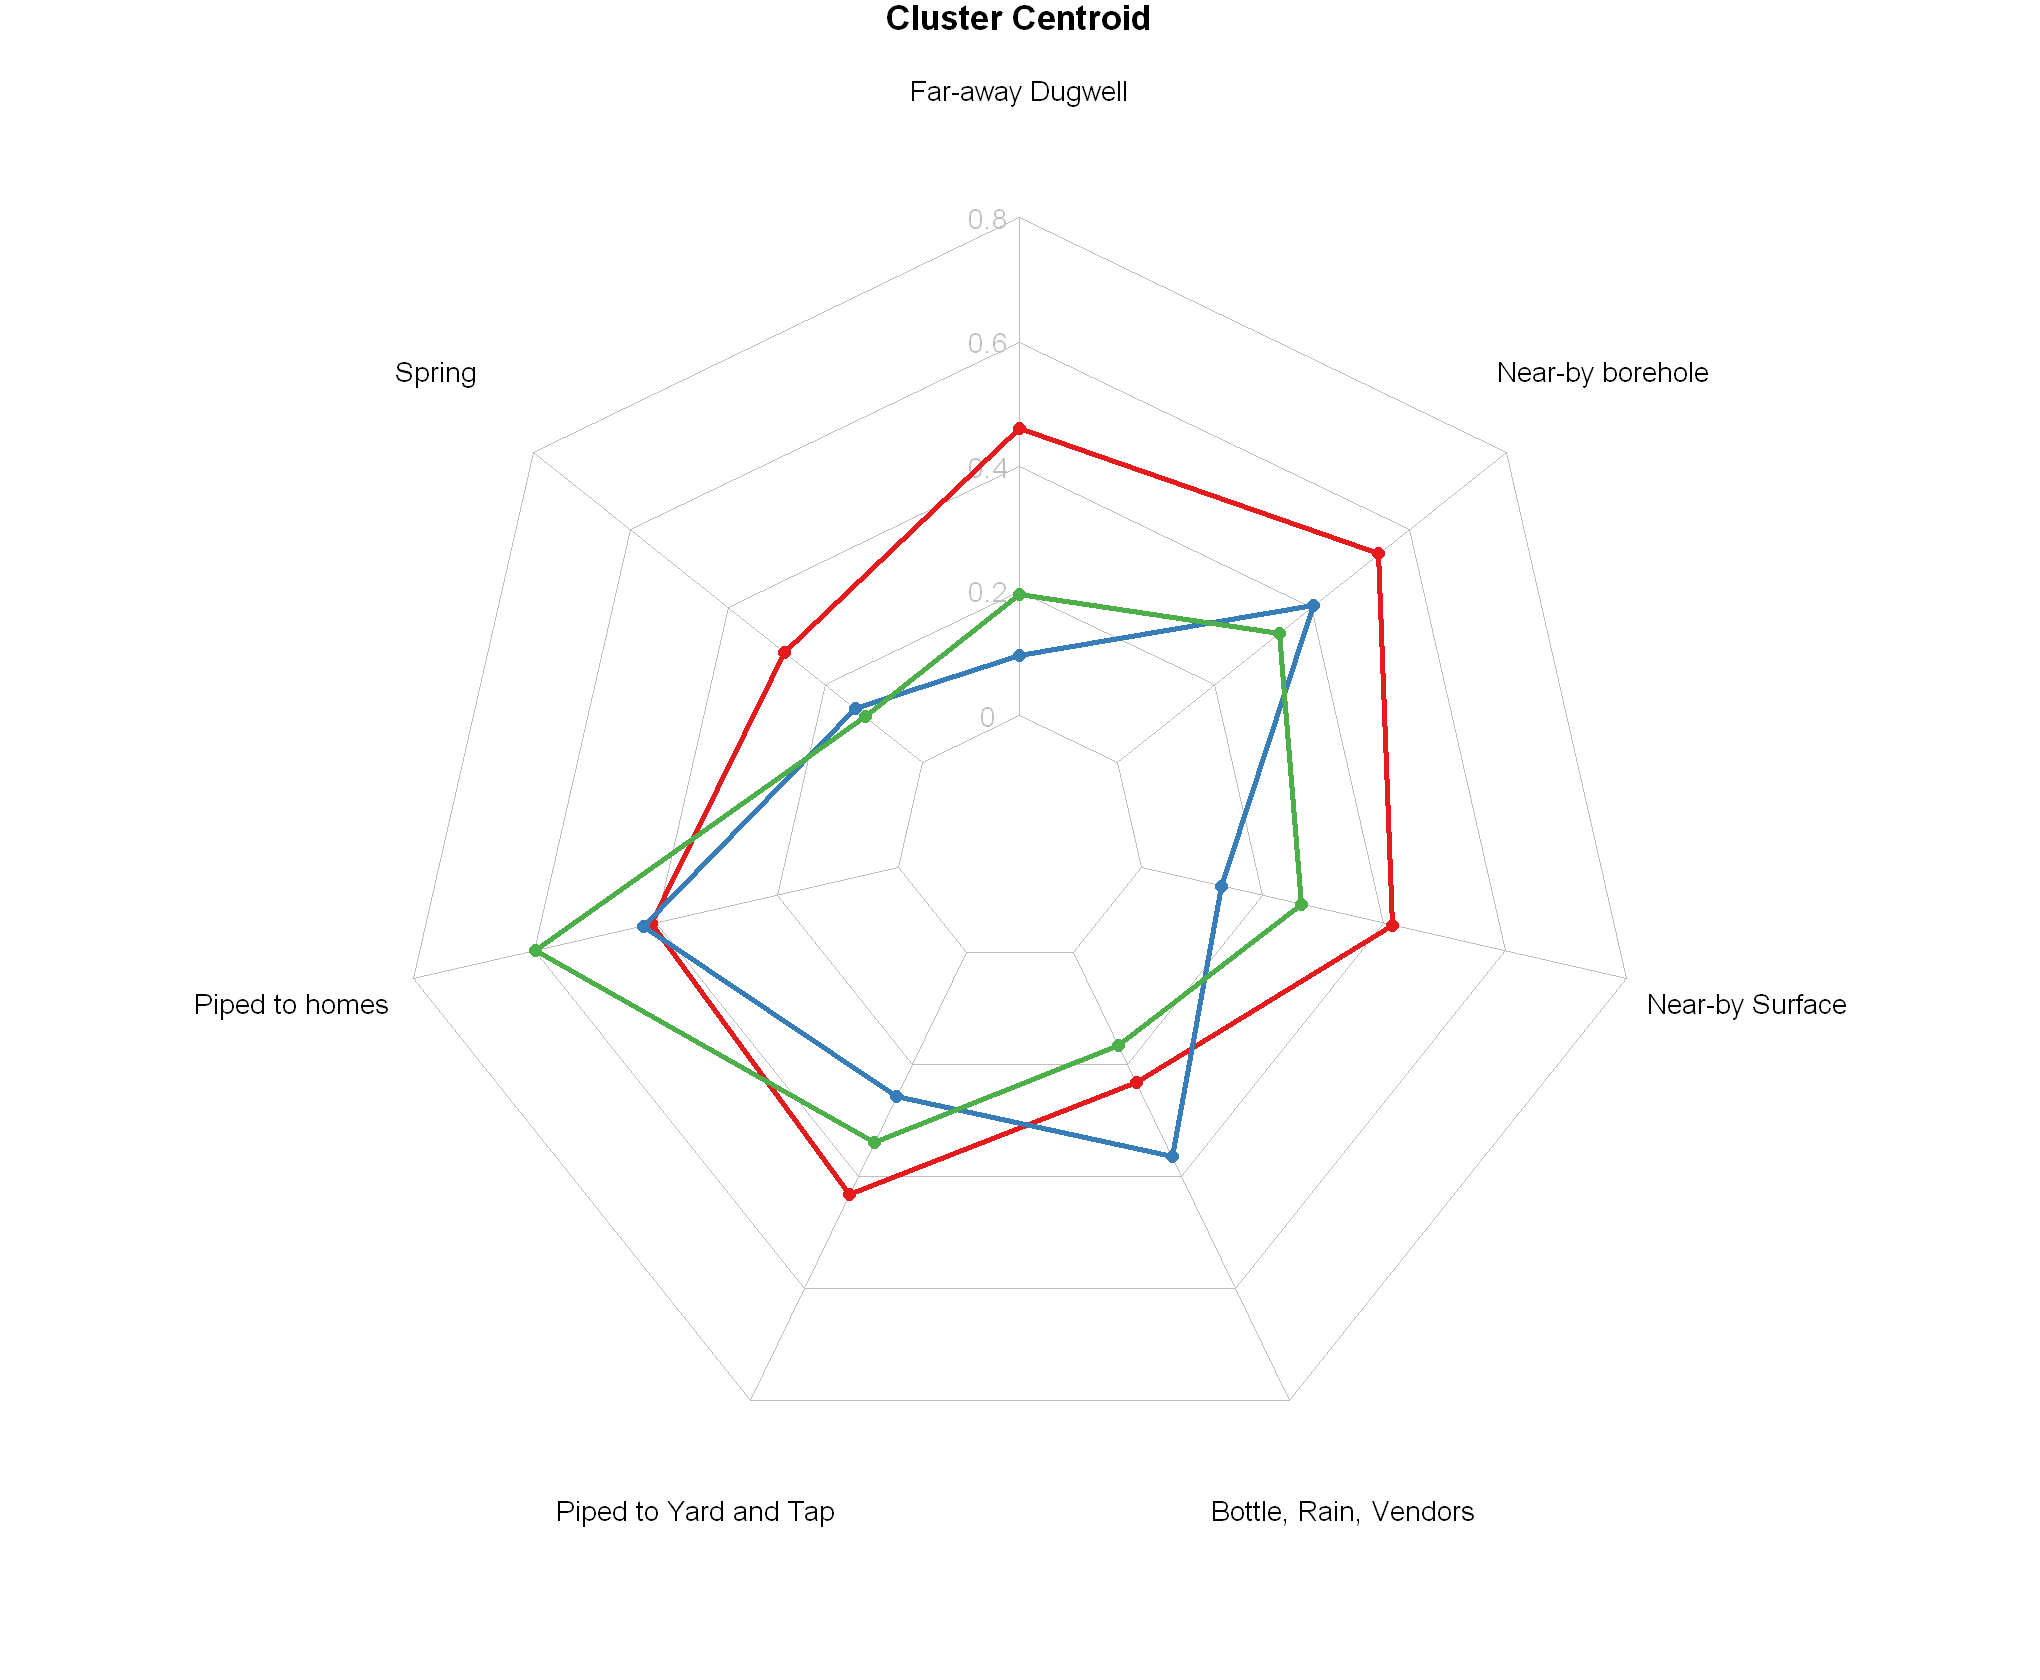

In [32]:
df.wa.fa <- read_excel("../../results/df-seven-scores.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)

df <- df.wa.fa[,c(2:8)]
head(df)
df <- df %>% 
  rename(
      'Far-away Dugwell' = ML1,
      'Bottle, Rain, Vendors'= ML2,
      'Piped to homes'= ML3,
      'Near-by borehole'= ML4,
      'Piped to Yard and Tap' = ML5,
      'Spring' = ML6,
      'Near-by Surface'= ML7
     )

#resizing graphs accordingly
options(repr.plot.width=7, repr.plot.height=7)                  
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)
                 
chart.Correlation(df, histogram=TRUE, pch=19 , tl.cex = .7 )
# Create data: Water Accessibility Aggregate
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.avg <- df.wa.aggregate[,1:8]
df.wa.avg

# Set1 easy to see '#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'
brewer.pal(n = 3, name = "Set1") # Best color scheme is Set1 

#barplots to recognize the distribution
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
#resizing graphs accordingly
options(repr.plot.width=10, repr.plot.height=7)                  
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)
                  
bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c('#E41A1C','#377EB8','#4DAF4A'),
        ylim = c(0, 10), names.arg = c("Off-premise", "Market", "Piping"))
#resizing graphs accordingly
options(repr.plot.width=17, repr.plot.height=10)                  
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)              
                  
barplot(as.matrix(df.wa.avg[,c(2:8)]),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Factor Weight",
        col = c('#E41A1C','#377EB8','#4DAF4A'),
        legend = c("Off-premise", "Market", "Piping"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 1))
                  
centroiddf.wa <- apply(df, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
data.spider <- rbind(rep(1,1) , rep(0,1) , df.wa.avg[,c(2:8)])
colnames(data.spider) <- c(                 
   "Far-away Dugwell",
"Spring",
"Piped to homes",
    'Piped to Yard and Tap',
    'Bottle, Rain, Vendors',
    "Near-by Surface",
    'Near-by borehole')                       
options(repr.plot.width=17, repr.plot.height=14)
par(mar = c(1,1,1,1))
par(cex=1.4)
# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c('#E41A1C','#377EB8','#4DAF4A','#984EA3' ) ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,1,.2), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 , )

# Box Plot of Water Accessibility Variables (Violin Plots)

In [33]:
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:8]
rownames(df.wa.aggregate) <- c("Worst Water Source", "Better Water Source", "Best Water Source")
data_wa_one <- df.wa.aggregate[,1:7]
df.wa.aggregate <- as.factor(df.wa.aggregate[,])

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3,1
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9,2
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5,1
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6,3
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9,3
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5,2


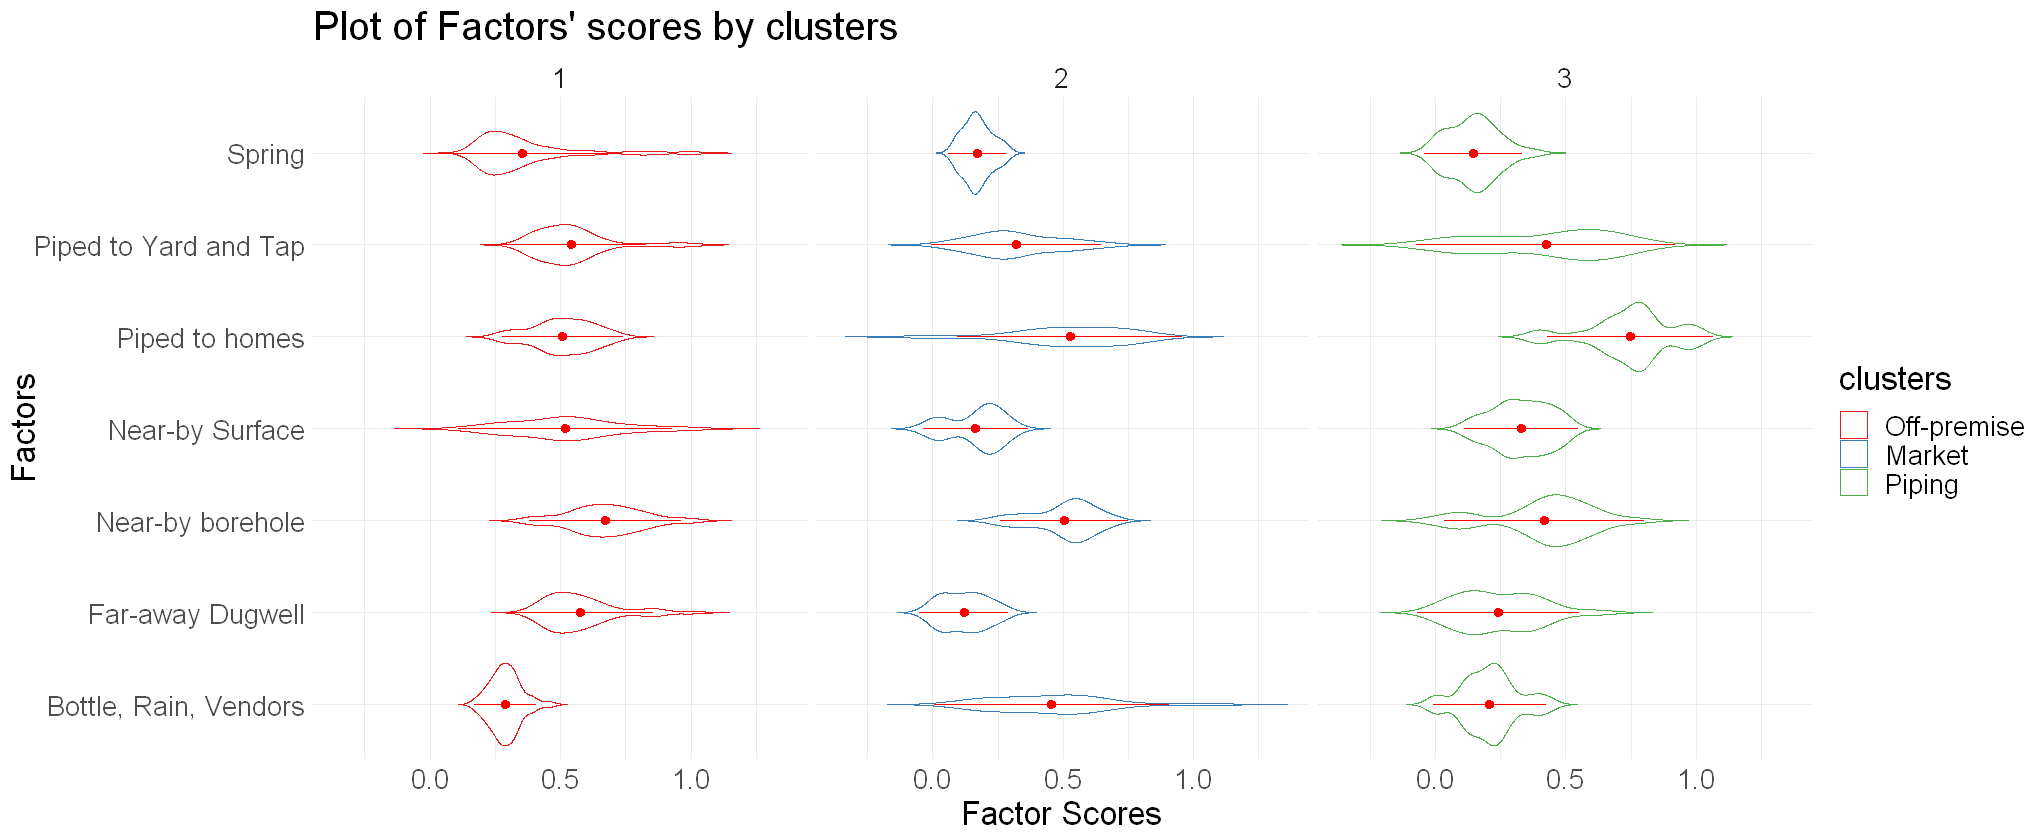

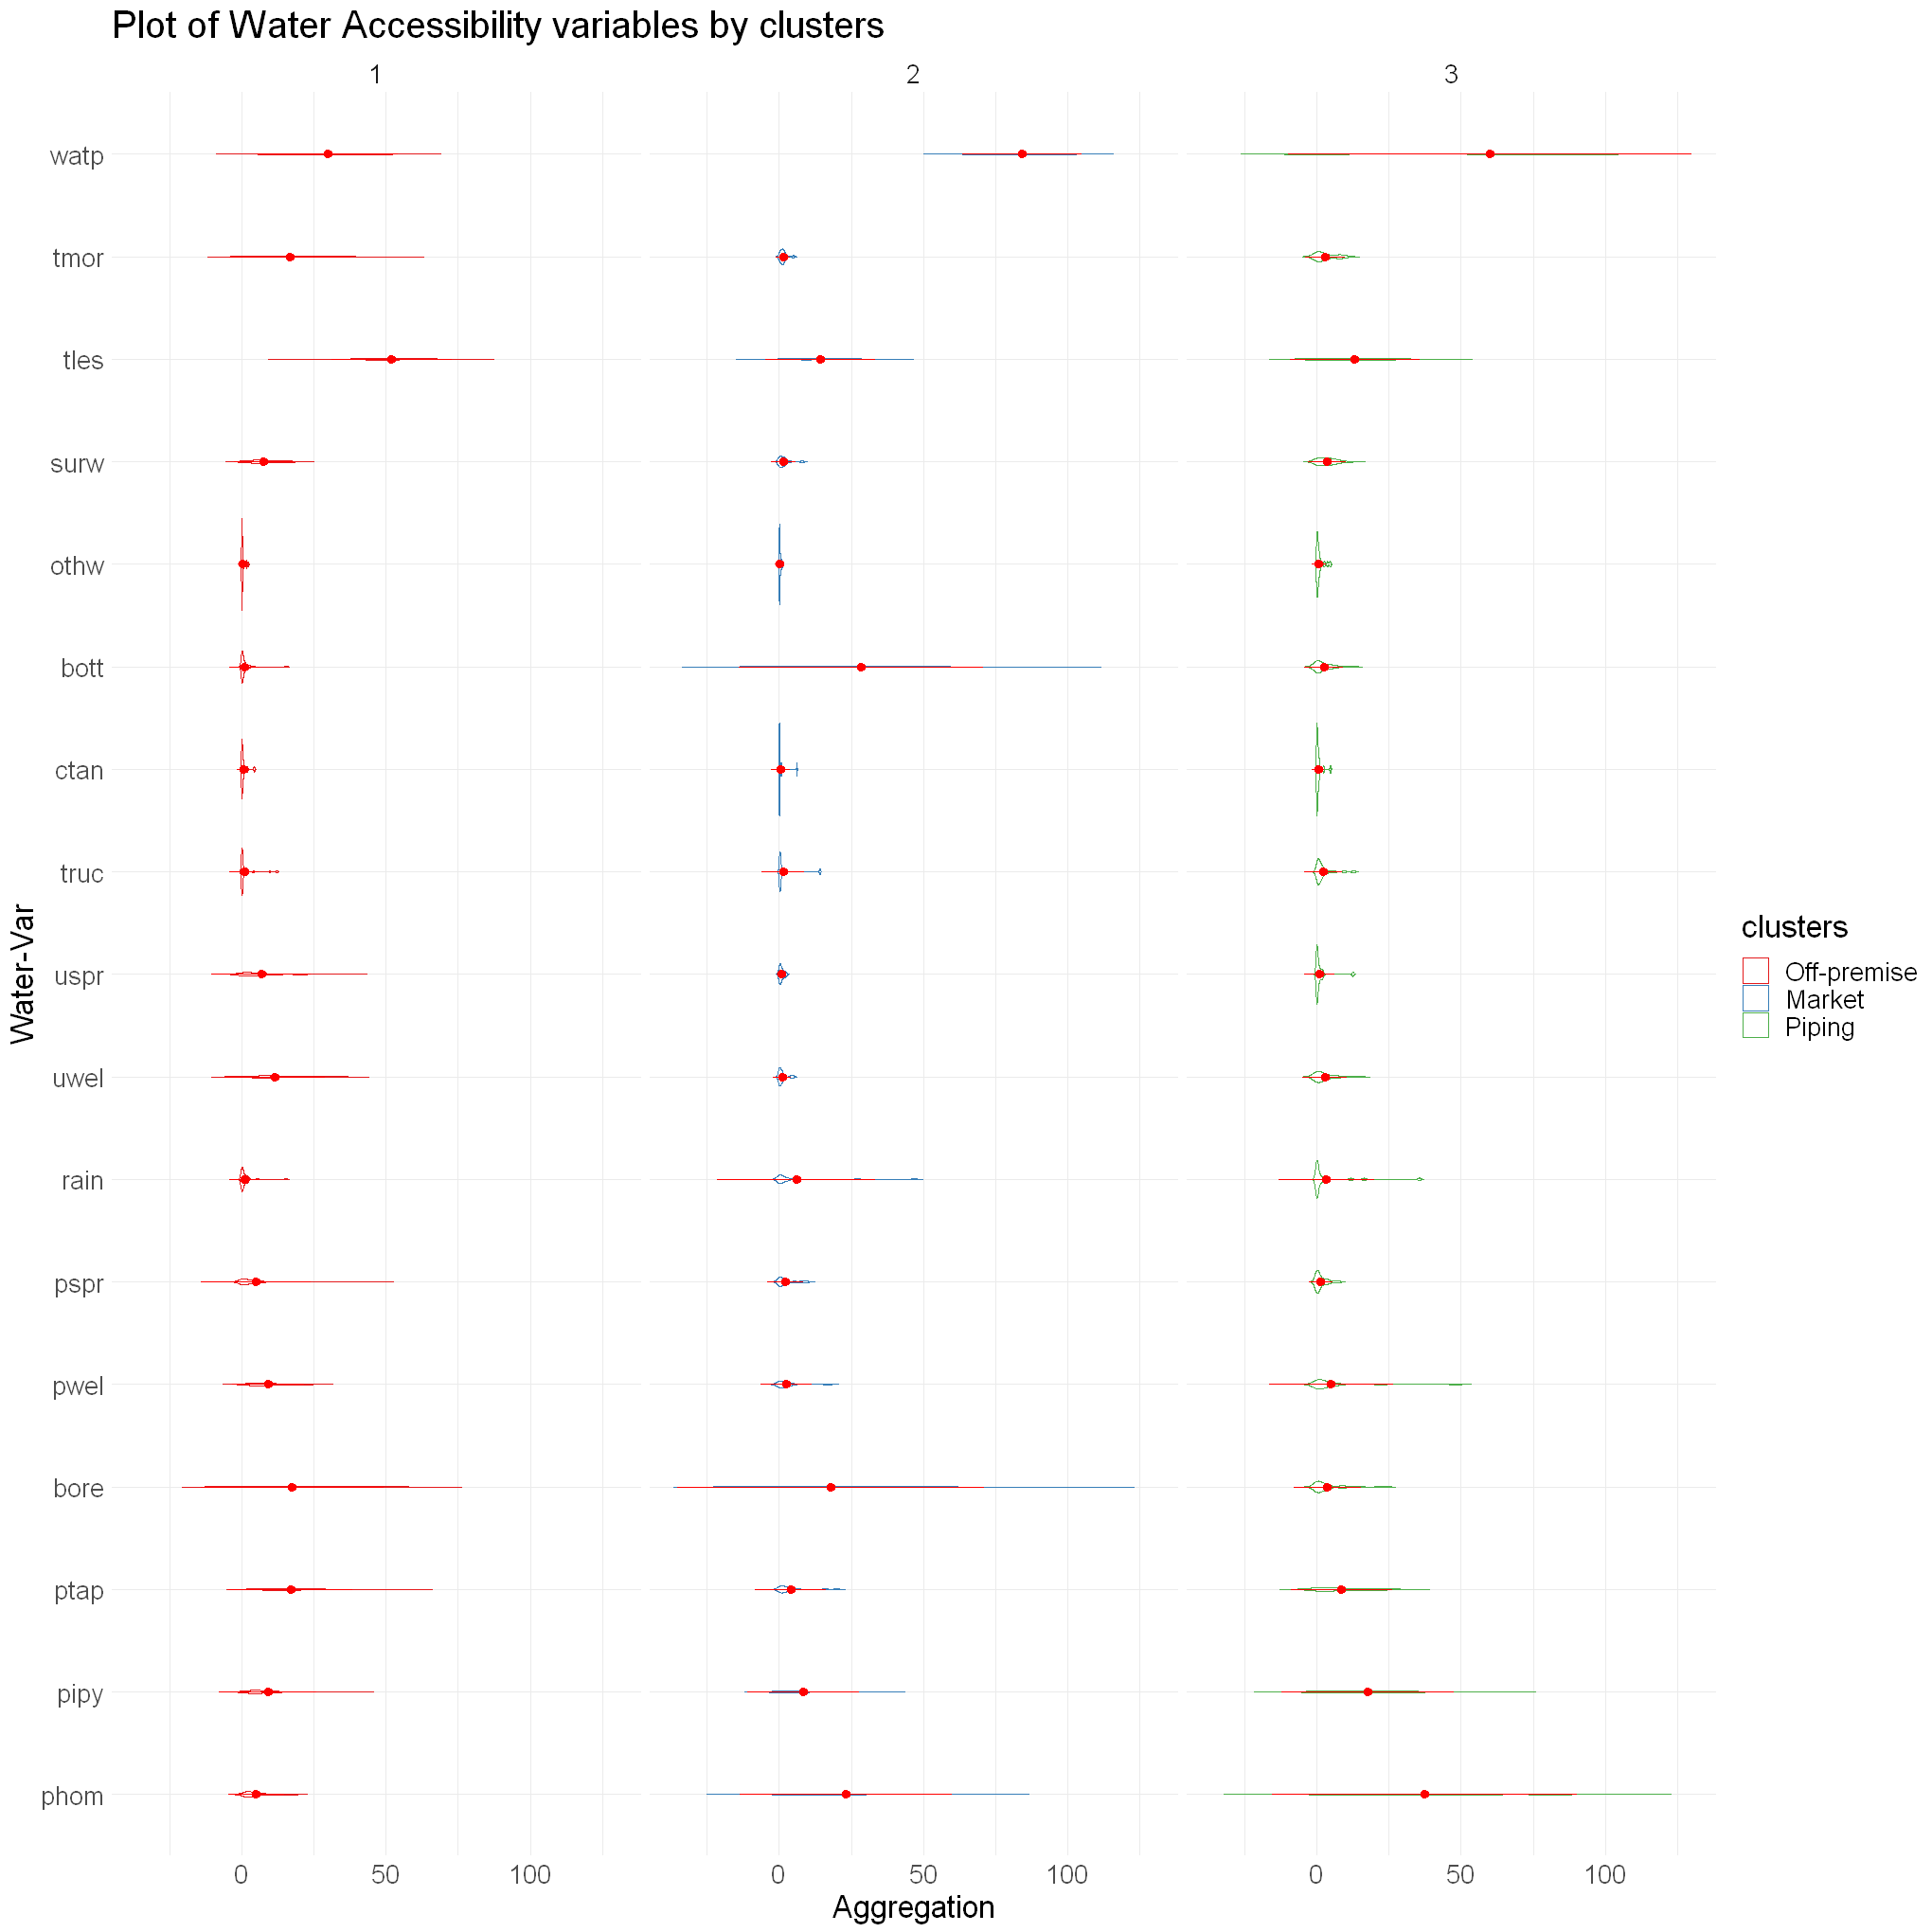

In [41]:
df.wa.fa <- read_excel("../../results/df-seven-scores.xlsx",sheet=1)

df.wa.fa <- df.wa.fa %>% 
  rename(
      'Far-away Dugwell' = ML1,
      'Bottle, Rain, Vendors'= ML2,
      'Piped to homes'= ML3,
      'Near-by borehole'= ML4,
      'Piped to Yard and Tap' = ML5,
      'Spring' = ML6,
      'Near-by Surface'= ML7
     )

df = read_excel('../../results/df-fa-seven-cluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
dfc = df[, c(1,11)] # select only country name and cluster number

df <- df.wa.fa[,c(1:8)]
dfv <- merge(x = dfc,
              y = df,
              by = c("Country"))

# Convert the variable dose from a numeric to a factor variable
dfv$clusters <- as.factor(dfv$clusters)
weight.m <- melt(dfv, id="clusters", 
                   measure=c(    
        'Bottle, Rain, Vendors' ,
        'Far-away Dugwell',
        'Near-by borehole',
        'Near-by Surface',
      'Piped to homes' ,
      'Piped to Yard and Tap' ,
      'Spring' ), 
                   variable.name="Factor", value.name="Weight")
#Sizing
options(repr.plot.width=17, repr.plot.height=7)
par(mar = c(1,1,1,1))
par(cex=5)

# Basic violin plot for all seven factors
p <- ggplot(data = weight.m, aes(x=Factor, y=Weight, fill = Weight, color = clusters)) + 
  geom_violin(trim=FALSE) +
    stat_summary(fun.data=mean_sdl, 
                 geom="pointrange", color="red") +
labs(title="Plot of Factors' scores by clusters",x="Factors", y = "Factor Scores") +
 theme_minimal() + 
 scale_color_manual(name = 'clusters', 
  labels = c("Off-premise", "Market", "Piping"),
    values=c('#E41A1C','#377EB8','#4DAF4A')) +
  facet_wrap(~ clusters , nrow=1) +
  coord_flip() +
    theme(text = element_text(size=20))
p 

dfw <- read_excel("../../results/df-water-access.xlsx",sheet=1)
dfw['clusters'] <- dfv$clusters

head(dfw)

agg.m <- melt(dfw, id="clusters", 
                   measure=c(
'phom', 'pipy','ptap','bore','pwel','pspr','rain','uwel','uspr','truc','ctan','bott','othw','surw','tles','tmor','watp'
                   ), 
                   variable.name="WA", value.name="Aggregation")
#Sizing
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

w <- ggplot(data = agg.m, aes(x= WA, y= Aggregation, fill = Aggregation, color = clusters)) + 
  geom_violin(trim=FALSE) +
    stat_summary(fun.data=mean_sdl, 
                 geom="pointrange", color="red") +
    labs(title="Plot of Water Accessibility variables by clusters",x="Water-Var", y = "Aggregation") +
    theme_minimal() + 
    scale_color_manual(name = 'clusters', 
    labels = c("Off-premise", "Market", "Piping"),
    values=c('#E41A1C','#377EB8','#4DAF4A')) +
  facet_wrap(~ clusters , nrow=1) +
  coord_flip() +
    theme(text = element_text(size=20))
w



# Facet Graphs 

Warning message in dist(df):
"NAs introduced by coercion"


Country,Far-away Dugwell,Spring,Piped to homes,Piped to Yard and Tap,"Bottle, Rain, Vendors",Near-by Surface,Near-by borehole,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Afghanistan,0.572418217,0.27948505,0.4740642,0.48905269,0.3327190,0.6406390,0.5244550,1
Albania,0.173347287,0.16631234,0.7812555,0.21604457,0.3179487,0.2668756,0.5813036,2
Angola,0.555402896,0.26567935,0.6221088,0.51799504,0.4010244,0.8739405,0.4280040,1
Armenia,0.006249719,0.01802207,0.9992766,0.05567089,0.0000000,0.1978413,0.5088645,3
Azerbaijan,0.172305543,0.17209406,0.6946237,0.41693952,0.2060016,0.4634648,0.4247652,3
Bangladesh,0.116506831,0.08746231,0.0000000,0.29168400,0.1829046,0.1907371,0.5876124,2



 1  2  3 
37 14 22 

clusters,Far-away Dugwell,Spring,Piped to homes,Piped to Yard and Tap,"Bottle, Rain, Vendors",Near-by Surface,Near-by borehole
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5772895,0.3551004,0.5083081,0.5406823,0.2896757,0.5182122,0.6721096
2,0.1207319,0.1722097,0.5267564,0.3216871,0.4563813,0.1655475,0.5040695
3,0.2426426,0.1464495,0.7482010,0.4242080,0.2079698,0.3301570,0.4164274


clusters      Far-away Dugwell                Spring 
             "factor"             "numeric"             "numeric" 
       Piped to homes Piped to Yard and Tap Bottle, Rain, Vendors 
            "numeric"             "numeric"             "numeric" 
      Near-by Surface      Near-by borehole 
            "numeric"             "numeric"

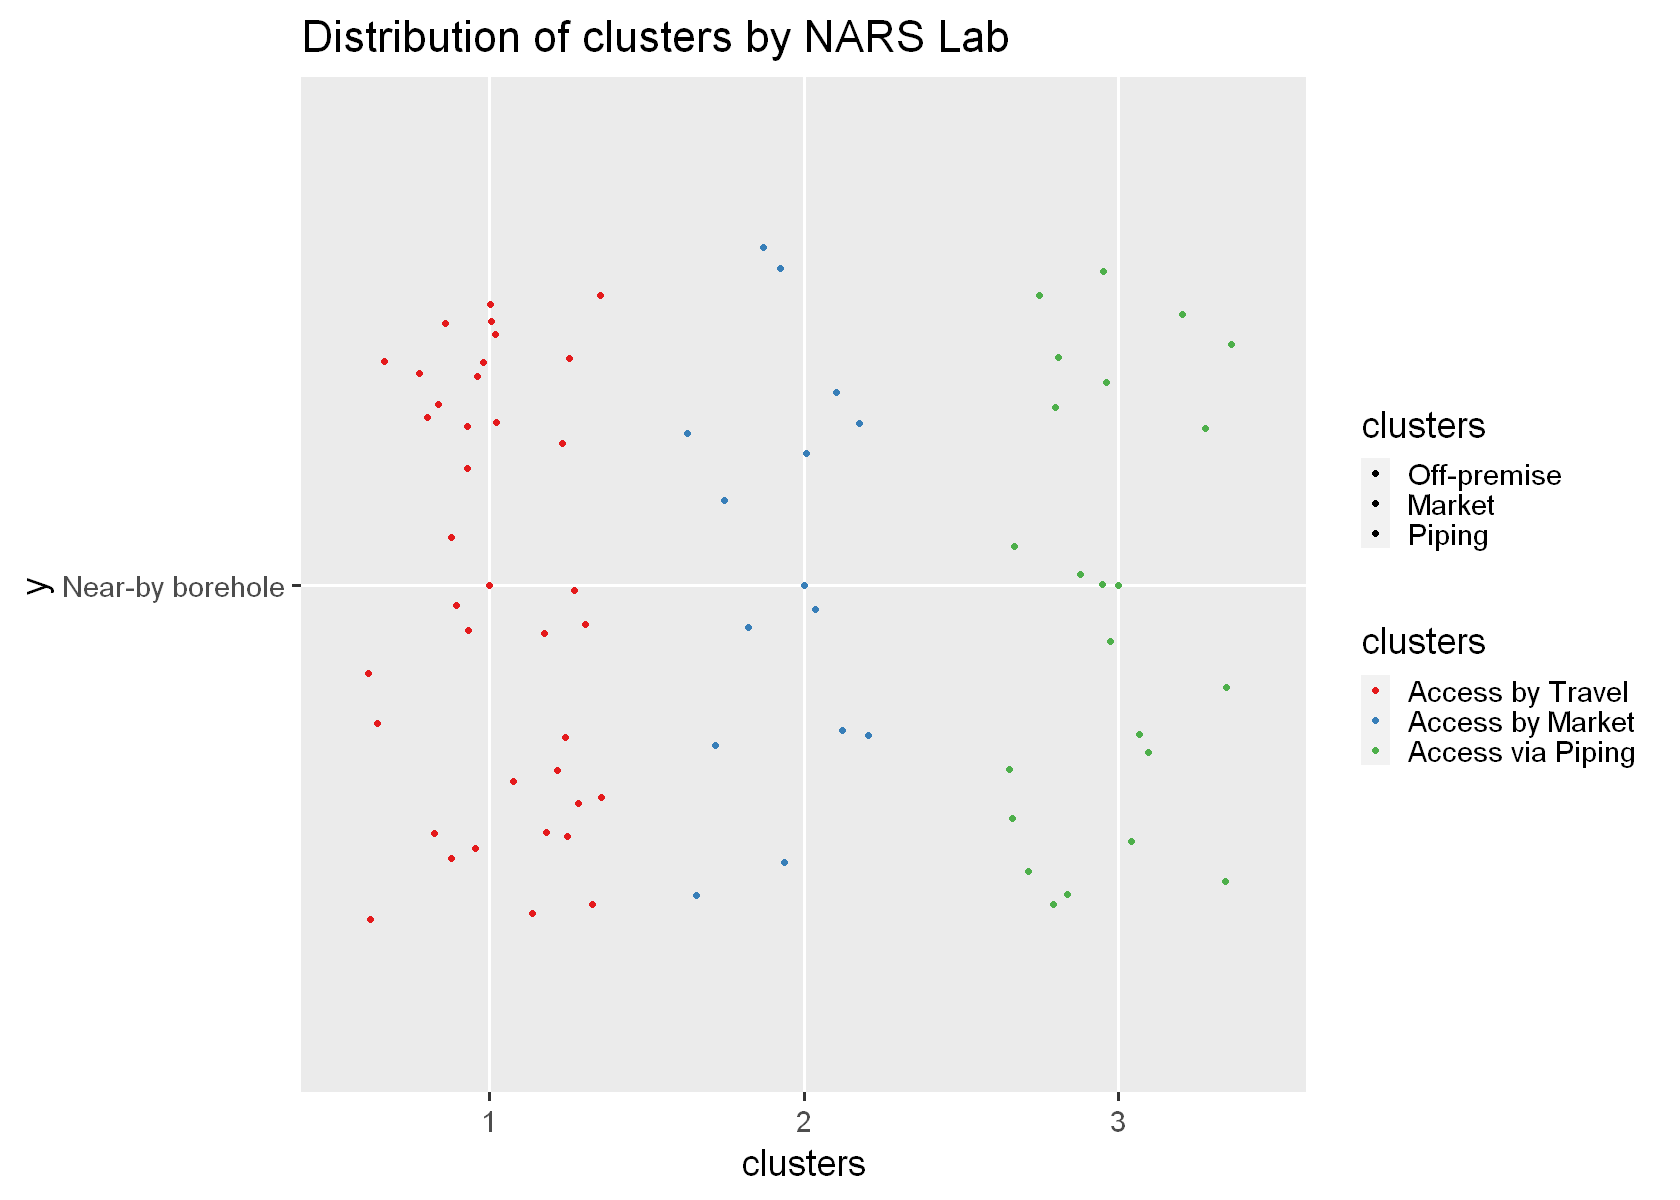

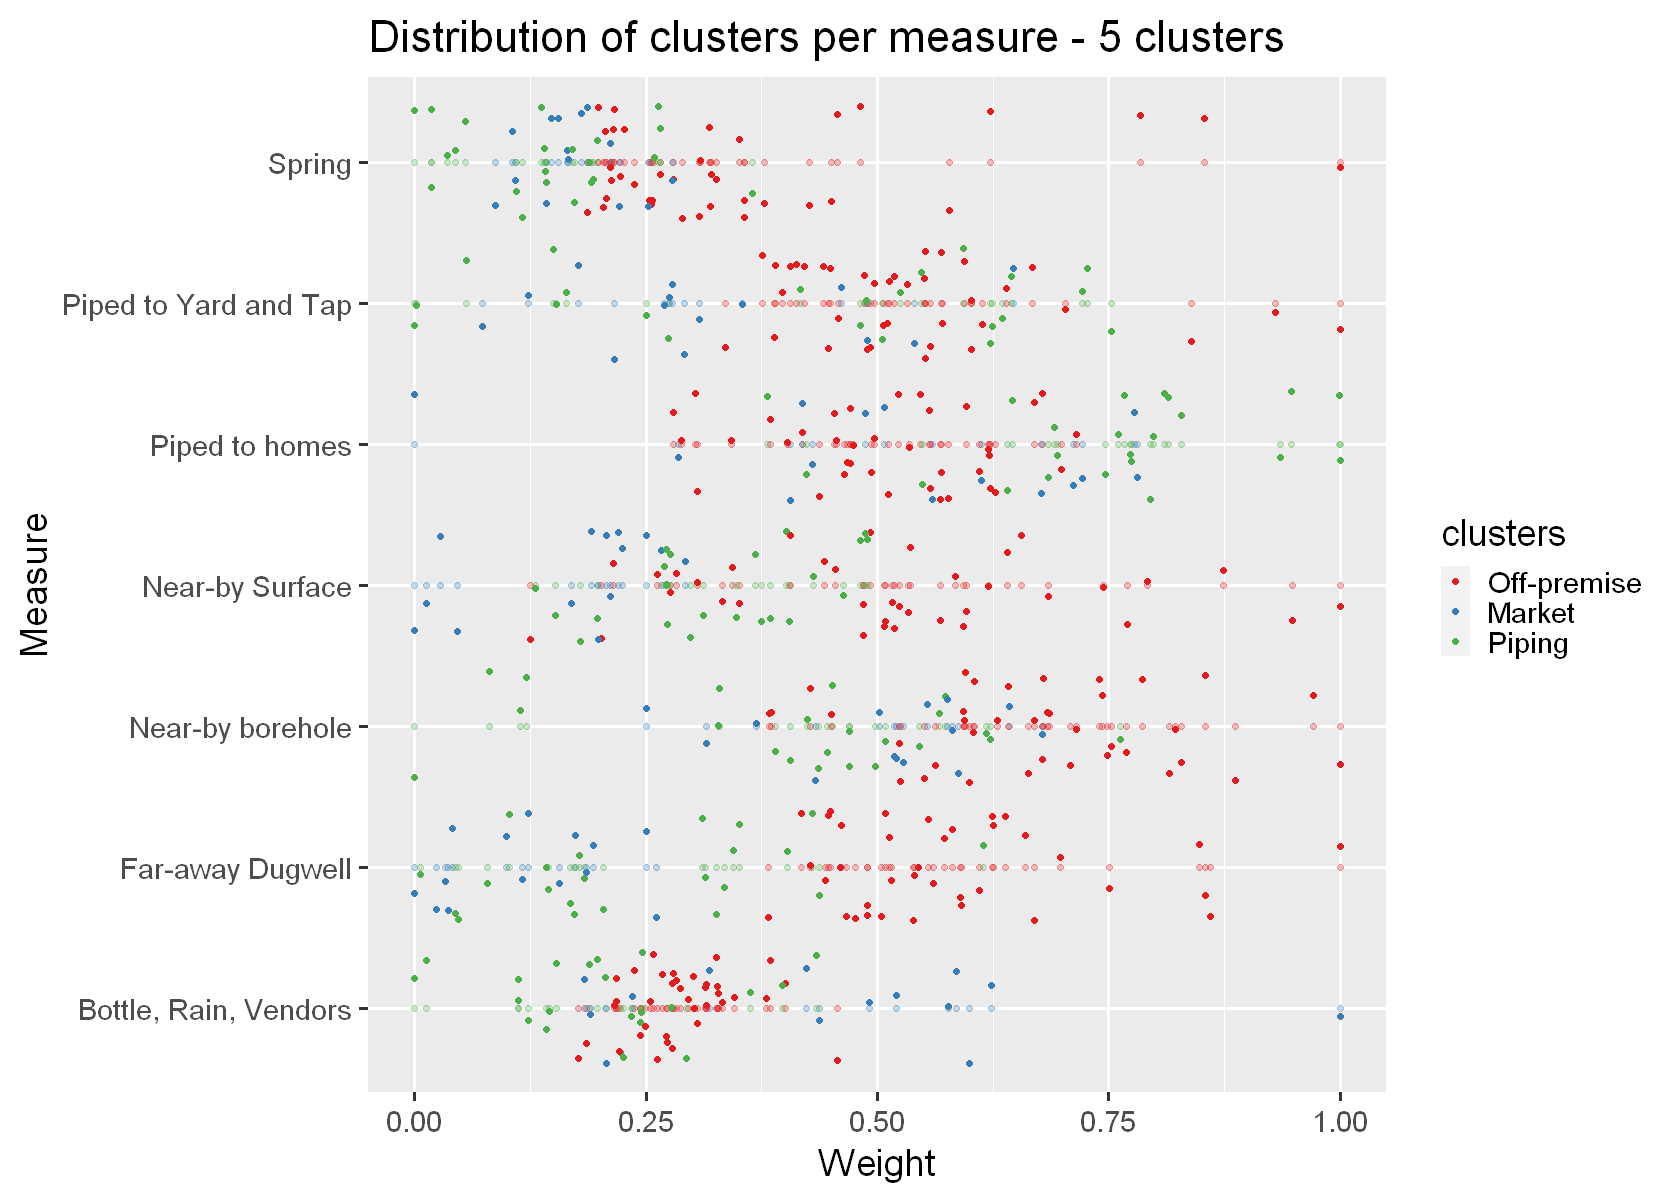

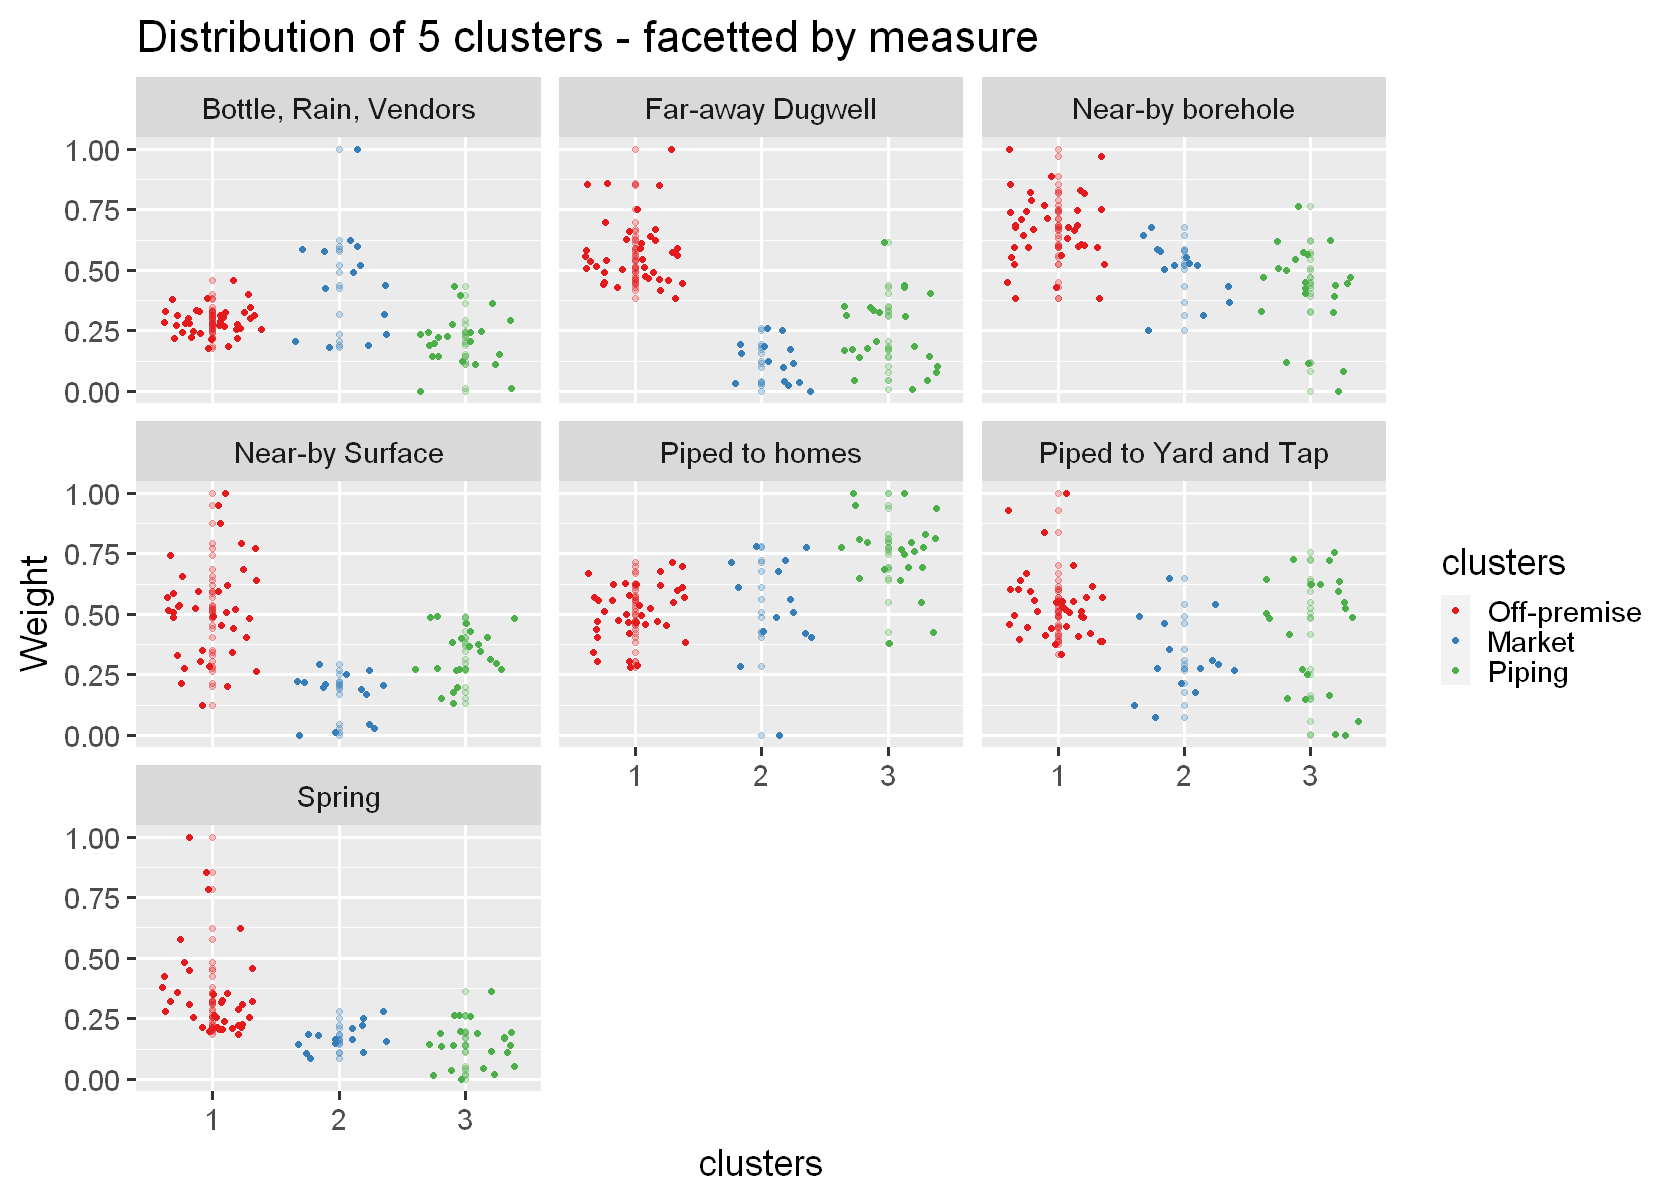

In [35]:
#data_wa$cluster <- cutree(hc.ward2,4) 
#head(df$clusters,7)

#Sizing
options(repr.plot.width=14, repr.plot.height=10)
par(mar = c(1,1,1,1))
par(cex=5)

hc.ward2=hclust(dist(df), method ="ward.D2")
df$clusters <- cutree(hc.ward2,3)
df$clusters <- as.factor(df$clusters)
head(df)

p <- ggplot(df, aes(clusters, 'Near-by borehole', color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(name = 'clusters', labels = c("Access by Travel", "Access by Market", "Access via Piping"),
                     values=c('#E41A1C','#377EB8','#4DAF4A') )
p <- p + theme_grey(base_size = 22) 
p + scale_fill_discrete(name = 'clusters', labels = c("Off-premise", "Market", "Piping"))

table(df$clusters)

#Group by the cluster assignment and calculate averages
df_clus_avg <- df %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


head(df_clus_avg,7) 

sapply(df_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df_clus_avg, columns = c(2:6), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries_gathered <- df %>% gather(Measure, Weight, 'Far-away Dugwell':'Near-by borehole') 

g <- ggplot(countries_gathered, aes(Measure, Weight, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 5 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(name = 'clusters', 
    labels = c("Off-premise", "Market", "Piping"),
        values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00')) 
g +  coord_flip()

countries_gathered %>% 

ggplot(aes(clusters, Weight, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 5 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(name = 'clusters',
            labels = c("Off-premise", "Market", "Piping"),
            values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'))
# set the set factor as for the clusters


# Ranking

In [36]:
df.wa <- read_excel("../../results/df-seven-scores.xlsx",sheet=1)
# clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variable
df.wa["norm"] <- apply(df.wa[2:8], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )          
df.wa["distToCentroid"] = 0 # initialize           
df.wa["clusters"] <- as.factor(dfsimple$clusters)
#Turn into numeric to find centroids             
# assuming centroiddf.wa is your vector of cluster centroids
# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa[,c(2:8)], list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,c(1:7)]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster                        
df <- df.wa            
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
df[df$clusters == 5, "distToCentroid"] = abs(df[df$clusters == 5, "norm"] - centroiddf.wa[5])
#df[df$clusters == 6, "distToCentroid"] = abs(df[df$clusters == 6, "norm"] - centroiddf.wa[6])                       
write_xlsx(df , '../../results/df-fa-seven-cluster-rank.xlsx')
                       
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 10, 11)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
cluster.five <- subset(df1, clusters == 5 )
#cluster.six <- subset(df1, clusters == 6 )
summary(cluster.one)            
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)


summary(cluster.two)                         
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)


summary(cluster.three) 
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)

                       
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)
#cluster.five %>% 
# arrange_at("Country", desc) %>%
#  arrange_at("distToCentroid") %>%
# arrange_at("clusters") %>%
# select(1:3)
#cluster.six %>% 
  #arrange_at("Country", desc) %>%
  # arrange_at("distToCentroid") %>%
  # arrange_at("clusters") %>%
# select(1:3)

   Country          distToCentroid     clusters
 Length:37          Min.   :0.001199   1:37    
 Class :character   1st Qu.:0.050935   2: 0    
 Mode  :character   Median :0.172354   3: 0    
                    Mean   :0.163323           
                    3rd Qu.:0.241669           
                    Max.   :0.470316           

Country,distToCentroid,clusters
<chr>,<dbl>,<fct>
Gambia,0.001199114,1
Rwanda,0.009476813,1
Niger,0.013604376,1
Lesotho,0.021743936,1
Congo Democratic Republic,0.029270942,1
Sierra Leone,0.033190824,1
Haiti,0.038649137,1
Mauritania,0.047022453,1
Madagascar,0.049706137,1


   Country          distToCentroid   clusters
 Length:14          Min.   :0.8866   1: 0    
 Class :character   1st Qu.:1.0772   2:14    
 Mode  :character   Median :1.1166   3: 0    
                    Mean   :1.1367           
                    3rd Qu.:1.1466           
                    Max.   :1.4368           

Country,distToCentroid,clusters
<chr>,<dbl>,<fct>
Dominican Republic,0.8866129,2
Guatemala,1.0414658,2
Albania,1.0521218,2
Nepal,1.0730515,2
Honduras,1.0894666,2
Guyana,1.0904959,2
Philippines,1.1086148,2
India,1.1246277,2
Jordan,1.1274074,2


   Country          distToCentroid  clusters
 Length:22          Min.   :1.852   1: 0    
 Class :character   1st Qu.:1.928   2: 0    
 Mode  :character   Median :2.003   3:22    
                    Mean   :2.016           
                    3rd Qu.:2.080           
                    Max.   :2.296           

Country,distToCentroid,clusters
<chr>,<dbl>,<fct>
Namibia,1.851990,3
Kyrgyz Republic,1.863369,3
Gabon,1.879565,3
Bolivia,1.882041,3
Nicaragua,1.922887,3
Comoros,1.923434,3
Senegal,1.940038,3
Peru,1.950687,3
Turkmenistan,1.970942,3


Country,distToCentroid,clusters
<chr>,<dbl>,<fct>


# World Map

https://stackoverflow.com/questions/18323832/plot-small-region-of-a-large-polygon-map-in-ggplot2

71 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
172 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Ivory Coast           Cameroon             
[13] Congo (Brazzaville)   Colombia              Dominican Rep.       
[16] Egypt                 Eritrea               Ethiopia             
[19] Gabon                 Ghana                 Guinea               
[22] Gambia                Guatemala             Guyana               
[25] Honduras              Haiti                 Indonesia            
[28] India                 Jordan                Kenya                
[31] Kyrgyzstan            Cambodia              Liberia              
[34] Lesotho               Morocco               Moldova              
[37] Madagascar            Mali                  Myanmar              
[40] Mozambique            Mauritania            Malawi               
[43] Namibia               Niger                 Nigeria              
[46] Nicaragua             Nepal                 Pakistan             
[49] Peru                  Philippines           Papua New Guinea     
[52] Rwanda                Senegal               Sierra Leone         
[55] Chad                  Togo                  Tajikistan           
[58] Turkmenistan          East Timor            Turkey               
[61] Tanzania              Uganda                Ukraine              
[64] Vietnam               Yemen                 South Africa         
[67] Zambia                Zimbabwe              Comoros              
[70] Maldives              Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

[1] "Congo"                     "Congo Democratic Republic"
[3] "Cote d'Ivoire"             "Dominican Republic"       
[5] "Eswatini"                  "Kyrgyz Republic"          
[7] "Timor-Leste"

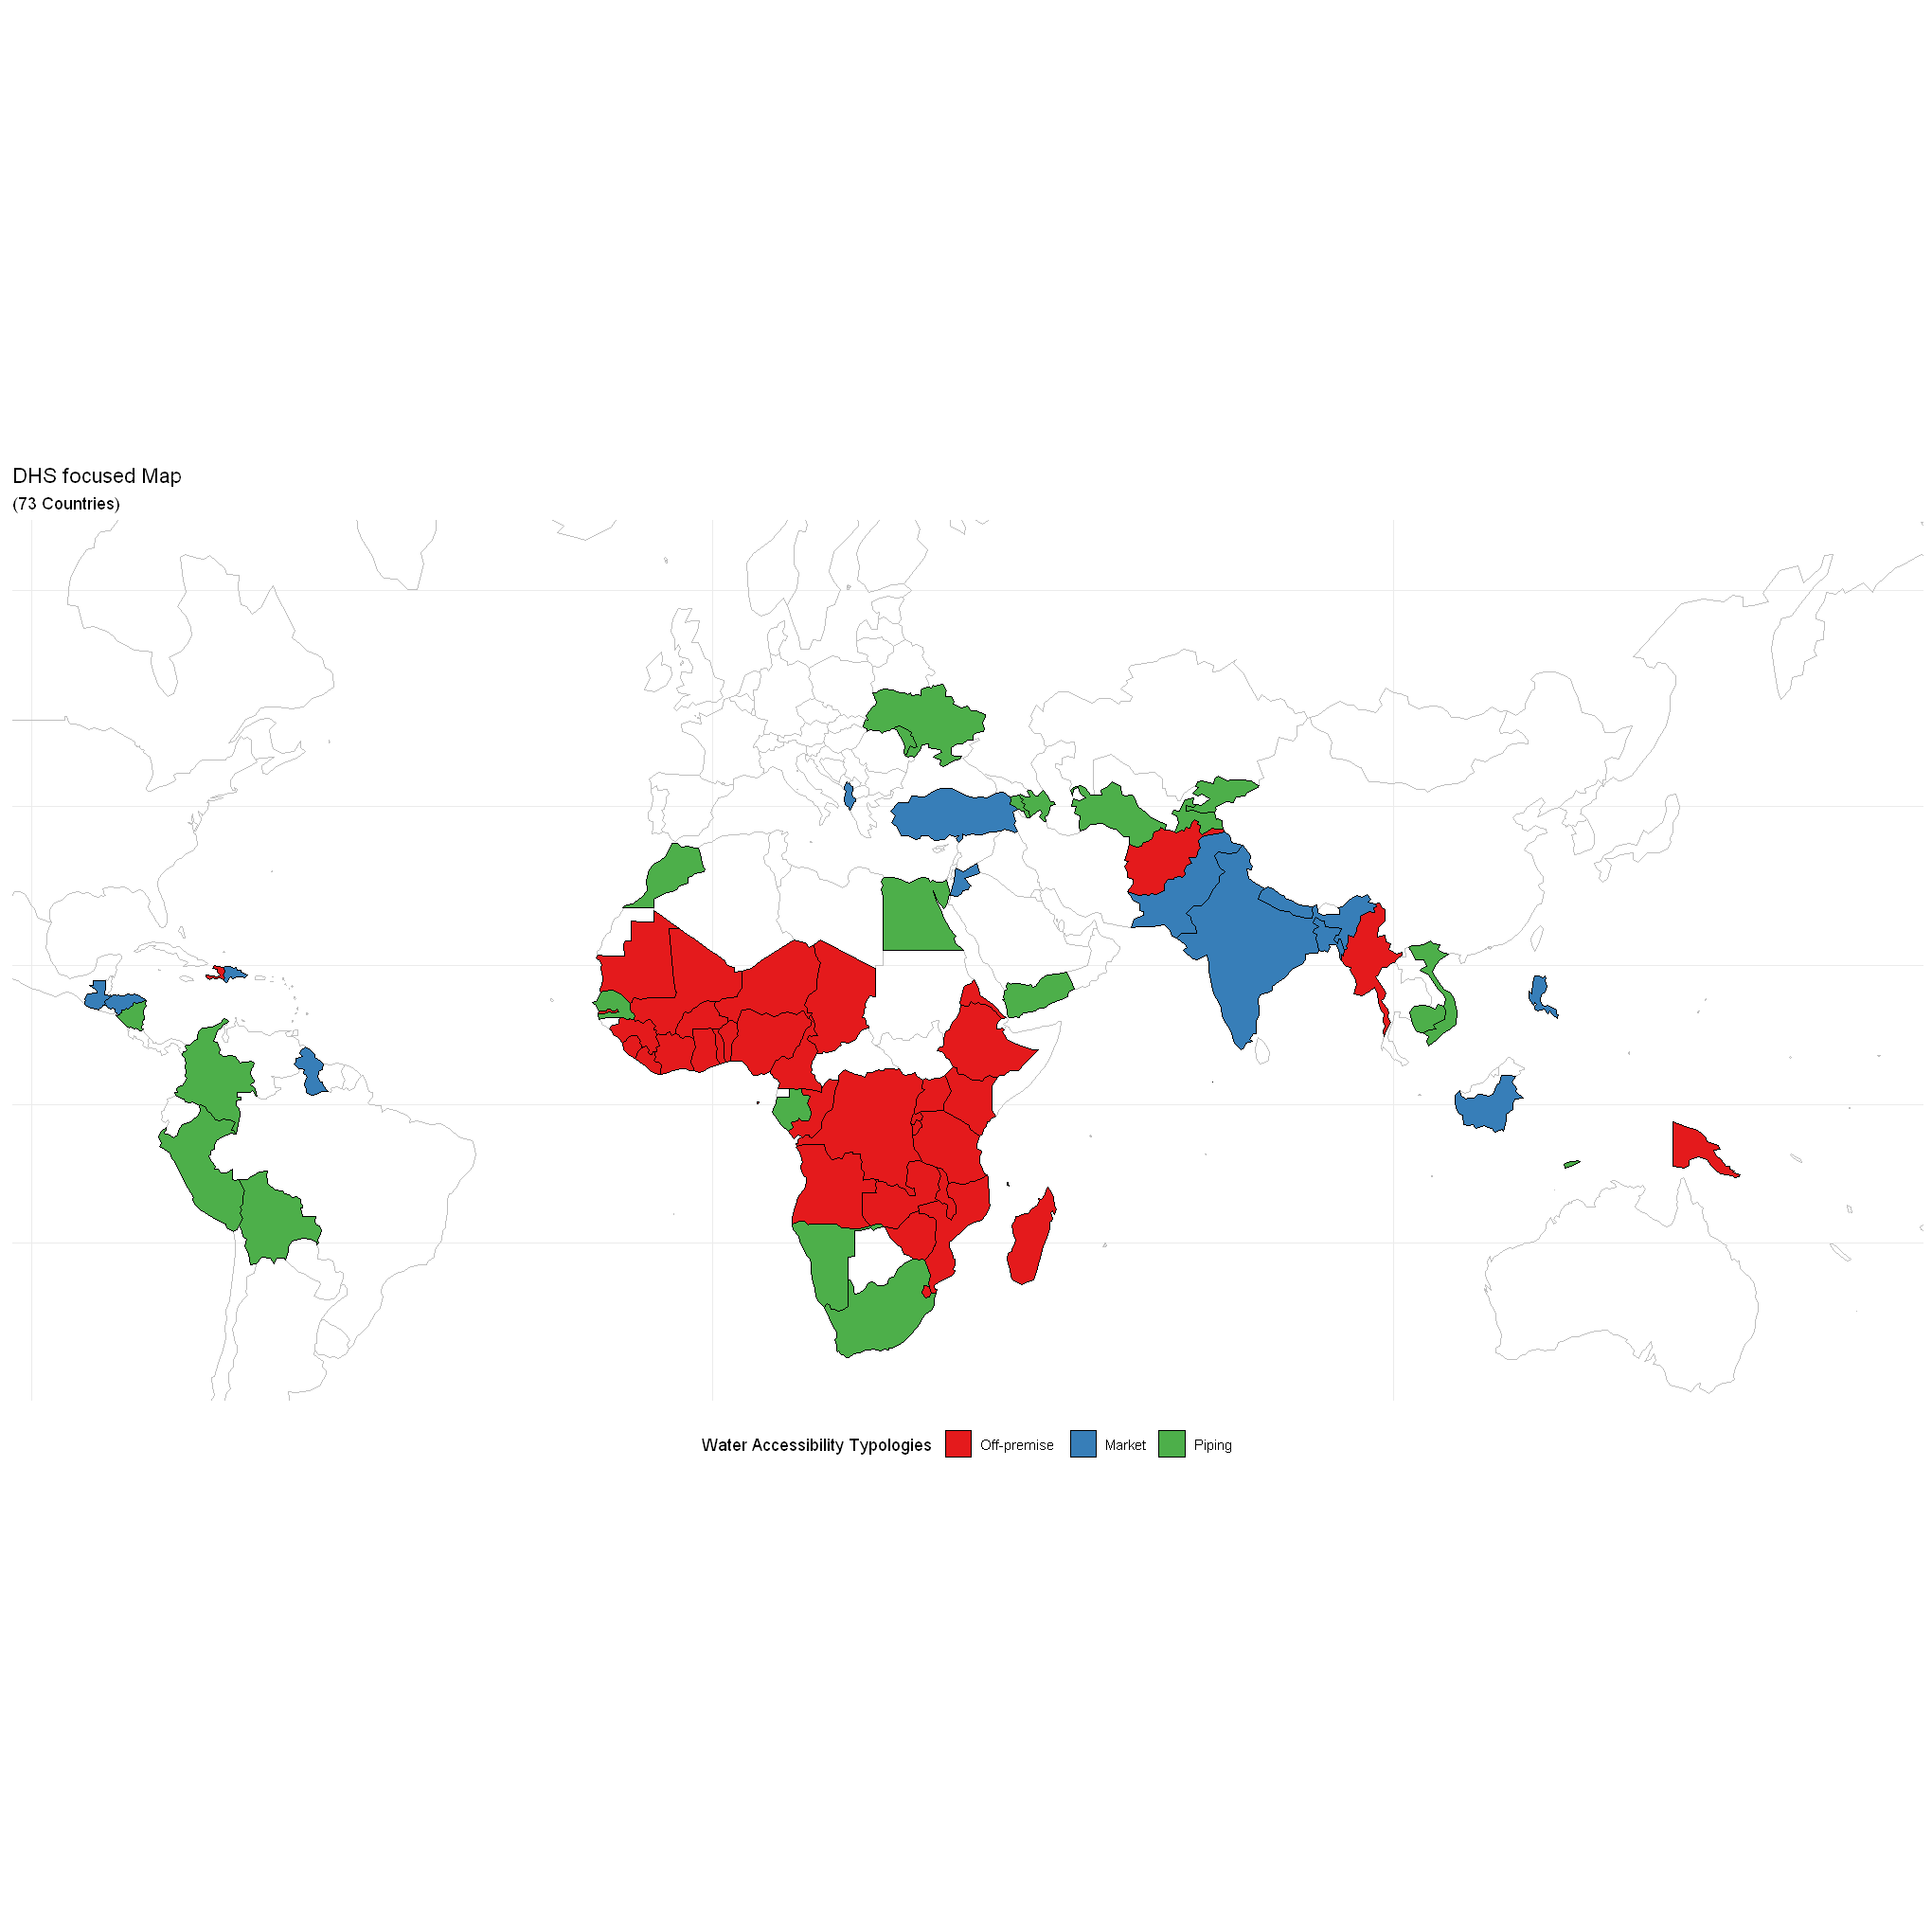

In [37]:
df = read_excel('../../results/df-fa-seven-cluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
df = df[, c(1,11)] # select only country name and cluster number
colnames(df) = c('region', 'value') # change column names for ggplot

# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name
setdiff(df$region,coords$name)

# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)

# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
m <- ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Set1', name="Water Accessibility Typologies", na.value="grey", 
                      labels = c("Off-premise", "Market", "Piping")) +  #labels = c())+
    ggtitle("DHS focused Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) +
#coord_map(xlim = c(-140, 170),ylim = c(-55, 80))
scale_x_continuous(limits = c(-145, 190)) +
scale_y_continuous(limits = c(-55, 100))

#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))
m + coord_map(xlim = c(-90, 165),ylim = c(-35, 60))

View a single RColorBrewer palette by specifying its name
display.brewer.pal(n = 8, name = 'Set1')
Set1 easy to see'#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'
brewer.pal(n = 5, name = "Set1") # Best color scheme is Set1 